In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe() #no missing values are present in the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


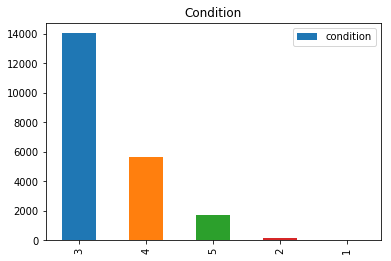

In [5]:
df['condition'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Condition');
plt.show()

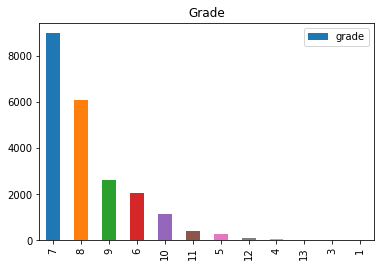

In [6]:
df['grade'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Grade');
plt.show()

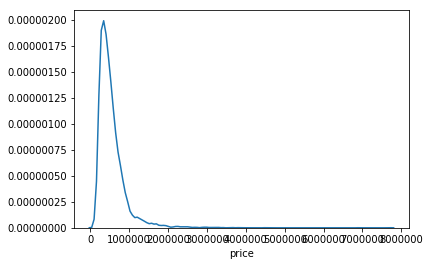

In [7]:
sns.distplot(df['price'], hist=False)

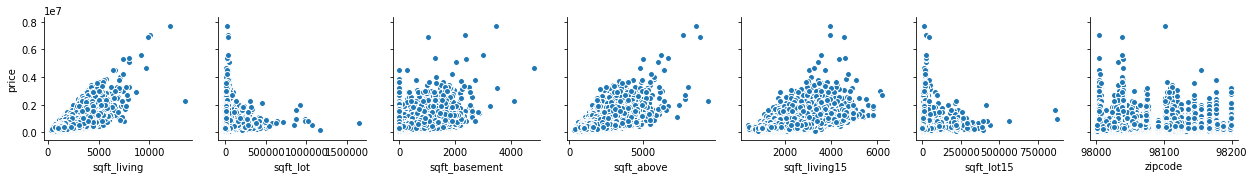

In [23]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','zipcode'], y_vars=["price"])

In [9]:
df2 = df[["price", "sqft_living"]]
df2.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


C:\Users\pradd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pradd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


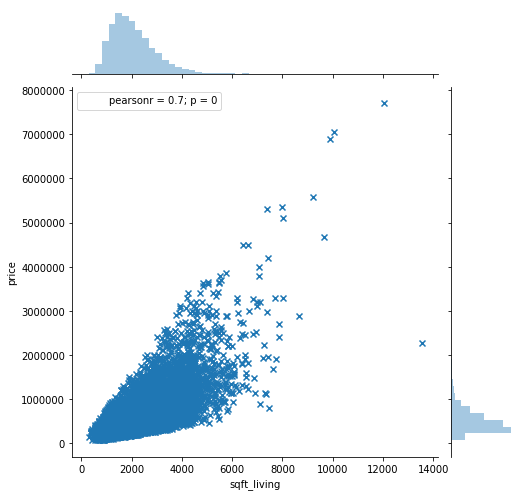

In [10]:
sns.jointplot('sqft_living','price', data=df2, size=7, marker='x')

In [11]:
df.groupby('zipcode')['price'].mean()

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
98006    8.596848e+05
98007    6.171051e+05
98008    6.455074e+05
98010    4.236660e+05
98011    4.903515e+05
98014    4.556171e+05
98019    4.247887e+05
98022    3.157093e+05
98023    2.867328e+05
98024    5.805268e+05
98027    6.169906e+05
98028    4.624800e+05
98029    6.126536e+05
98030    2.961880e+05
98031    3.005399e+05
98032    2.512962e+05
98033    8.037195e+05
98034    5.216529e+05
98038    3.668676e+05
98039    2.160607e+06
98040    1.194230e+06
98042    3.116321e+05
98045    4.394711e+05
98052    6.452315e+05
98053    6.781631e+05
             ...     
98092    3.349211e+05
98102    9.012583e+05
98103    5.849192e+05
98105    8.628252e+05
98106    3.195814e+05
98107    5.790534e+05
98108    3.556785e+05
98109    8.796236e+05
98112    1.095499e+06
98115    6.199005e+05
98116    6.186342e+05
98117    5.767950e+05
98118    4.176374e+05
98119    8.494480e+05
98

C:\Users\pradd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pradd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


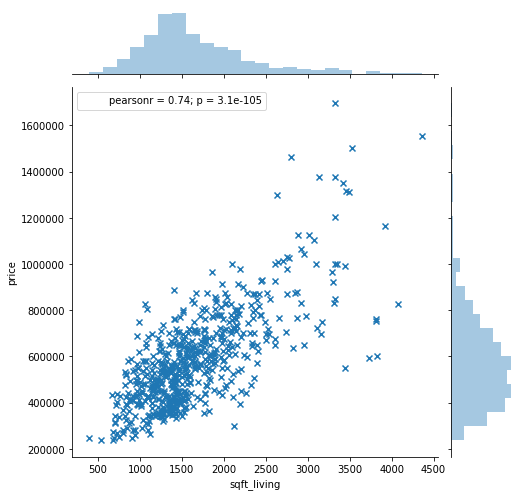

In [12]:
zip98103 = df['zipcode'] == 98103 
zip98039 = df['zipcode'] == 98039
sns.jointplot('sqft_living','price', data=df2[zip98103], size=7, marker='x')

In [13]:
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

In [14]:
df3=df2[zip98039]
X = df3.iloc[:,1].values
Y = df3.iloc[:,0].values
X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)

Text(0.5,1,'Price Vs. Sqft_living in Zipcode:98039')

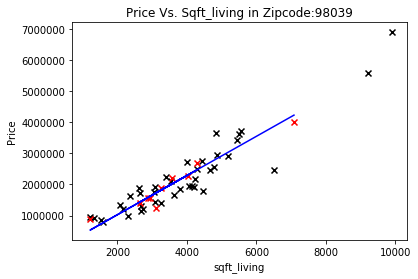

In [15]:
plt.scatter(X_train,Y_train,  color='black',marker = 'x')
plt.scatter(X_test,Y_test,  color='red',marker = 'x')
plt.plot(X_test,Y_pred, color='blue')
plt.ylabel('Price')
plt.xlabel('sqft_living')
plt.title("Price Vs. Sqft_living in Zipcode:98039")

In [16]:
from  sklearn.metrics  import r2_score 
print("The Accuracy of Linear Regression Model for sqft_living vs. price is:", r2_score(Y_test,Y_pred)*100, "%")

The Accuracy of Linear Regression Model for sqft_living vs. price is: 93.37969425495089 %


In [17]:
da = df.drop(['id'],axis=1)
conv_dates = [1 if values == 2014 else 0 for values in da.date] #date is converted into 0s and 1s
da['date'] = conv_dates
da['bathrooms'] = da['bathrooms'].astype(int)
da['floors'] = da['floors'].astype(int)

In [18]:
x = da.drop(['price'],axis=1).values
y = da['price'].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [20]:
print("The Accuracy of Linear Regression Model is:", r2_score(y_test,y_pred)*100, "%")

The Accuracy of Linear Regression Model is: 69.64693580169414 %


In [21]:
from sklearn.ensemble import GradientBoostingRegressor 
reg=GradientBoostingRegressor(n_estimators=600,min_samples_split=2,max_depth=5,loss='ls')

reg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [24]:
pred = reg.predict(x_test)

from sklearn.metrics import r2_score 
print("The Accuracy of Gradient Boosting Regression Model is:", r2_score(y_test,pred)*100, "%")

The Accuracy of Gradient Boosting Regression Model is: 90.60309605594635 %
